In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Temp_forecast_data.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df.dropna()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [7]:
df.dropna(inplace=True)

In [8]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [11]:
df_cor=df.corr()

In [12]:
df_cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<Axes: >

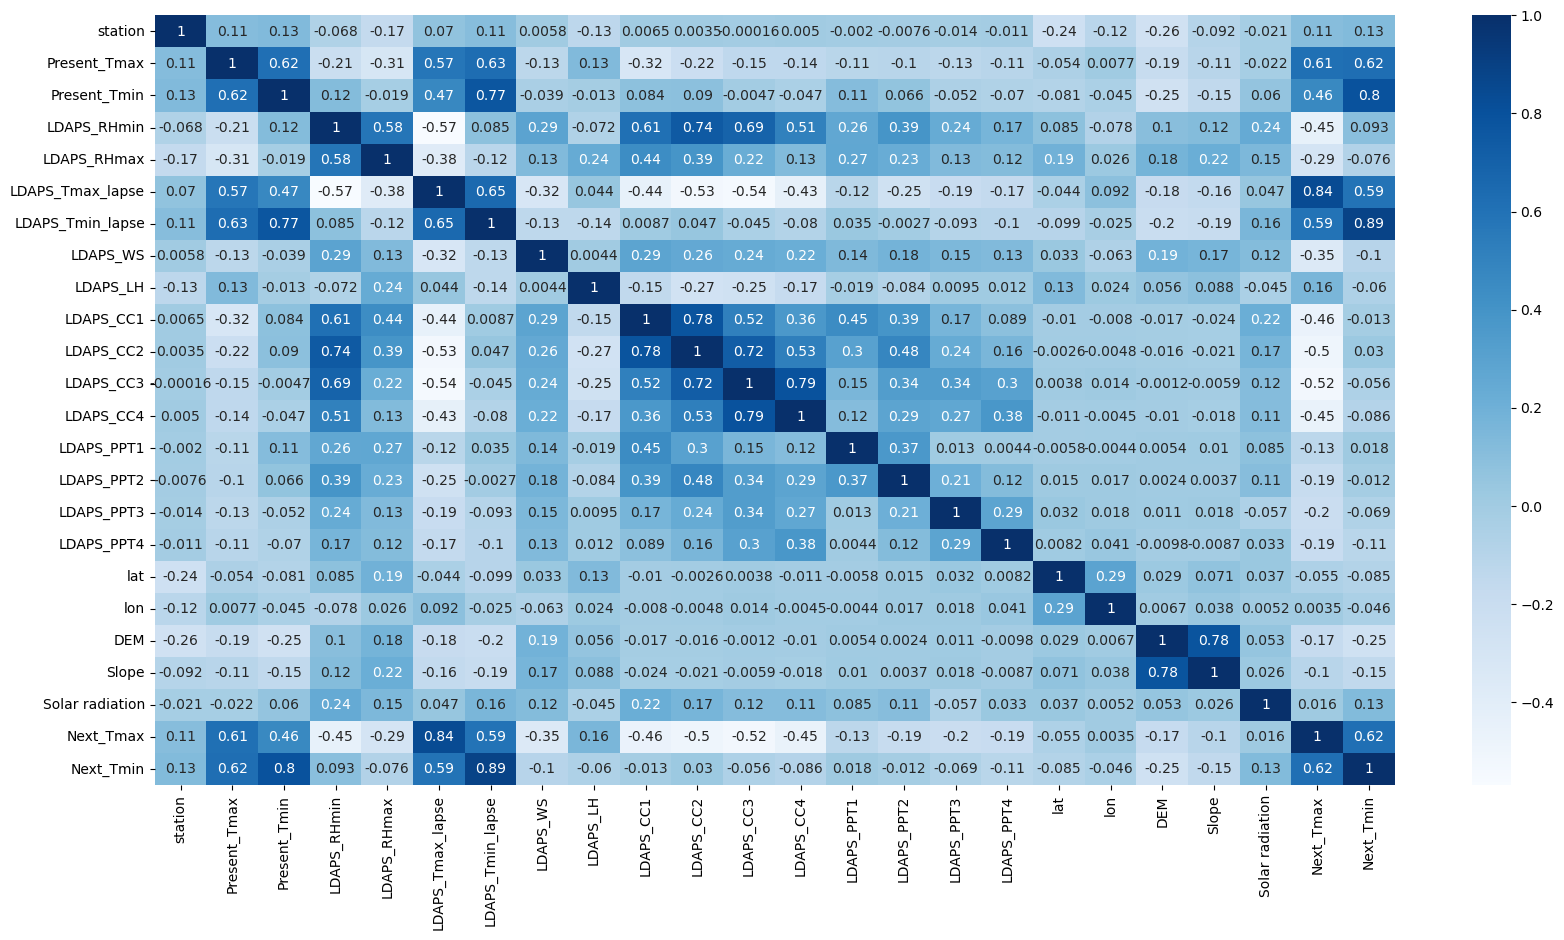

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cor,annot=True,cmap='Blues')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


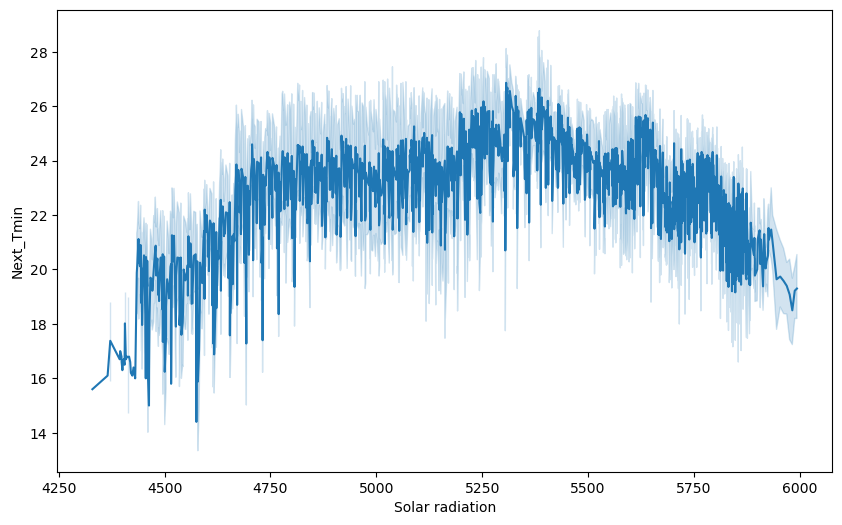

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

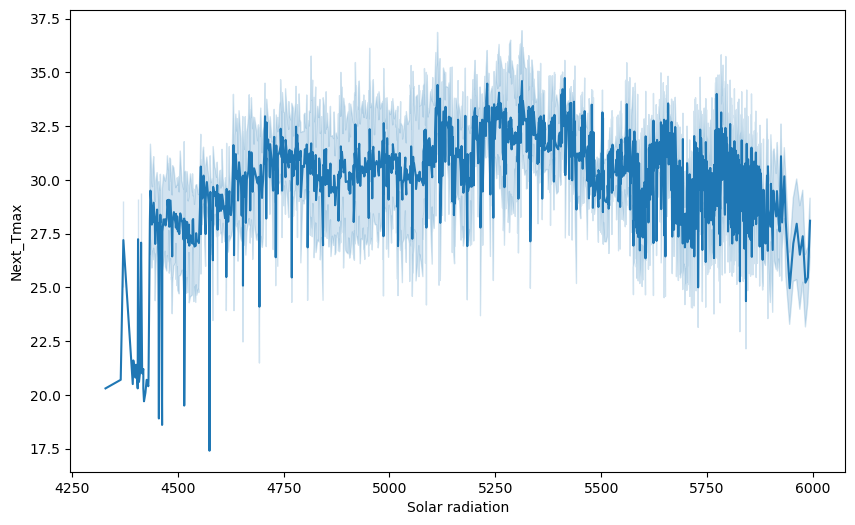

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

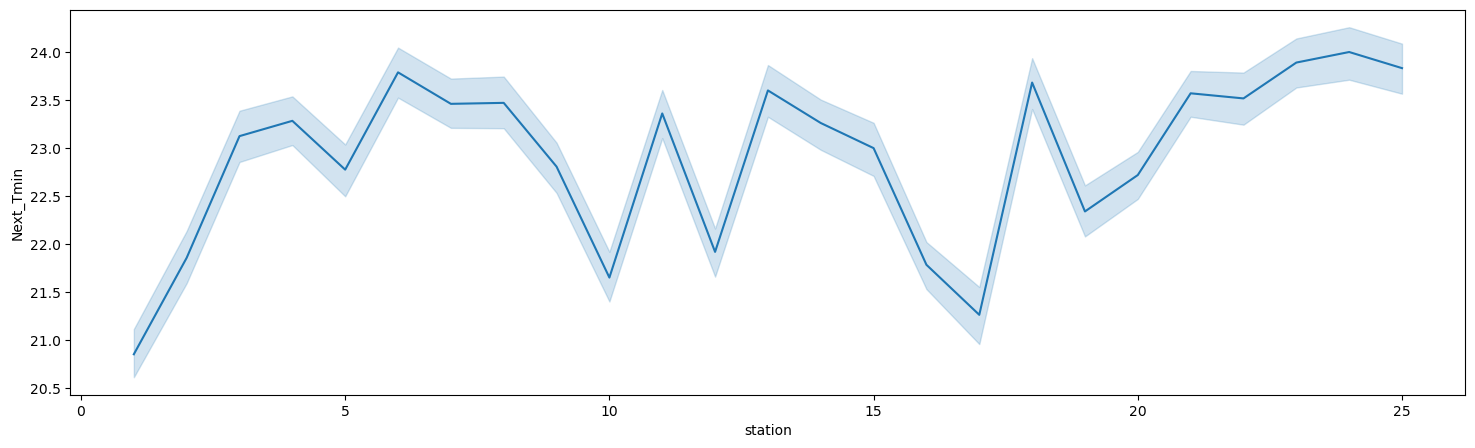

In [17]:
plt.figure(figsize=(18,5))
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

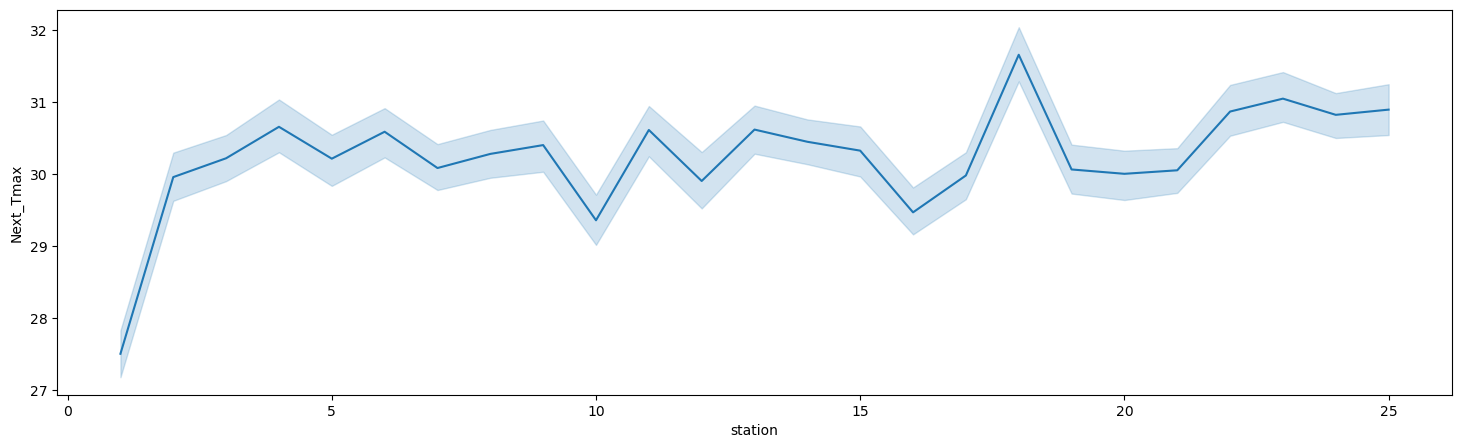

In [18]:
plt.figure(figsize=(18,5))
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

Text(0, 0.5, 'Next_Tmax')

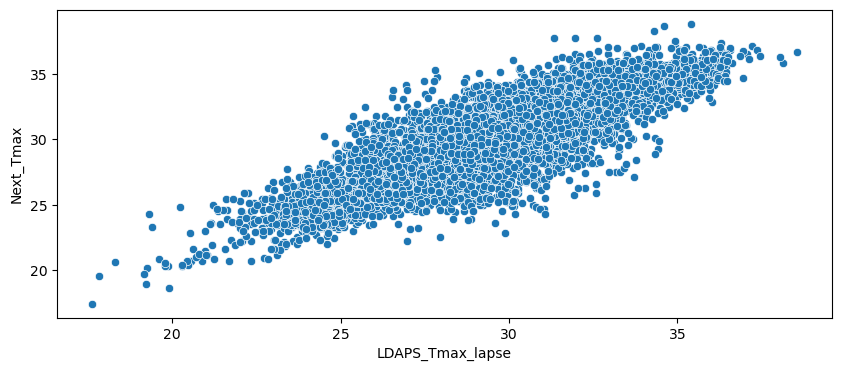

In [19]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmin')

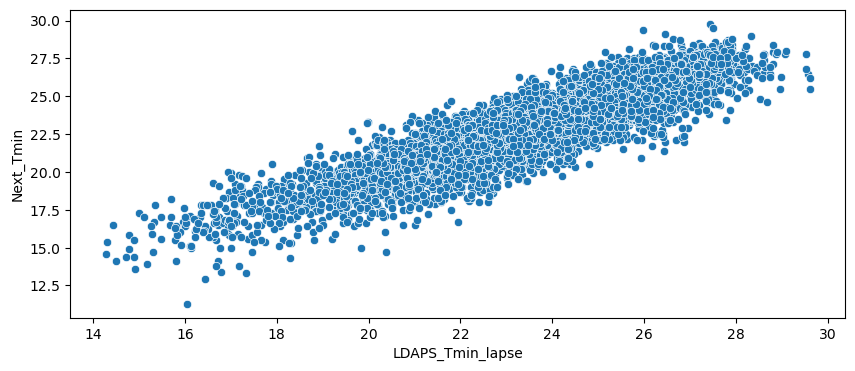

In [20]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

In [21]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Text(0, 0.5, 'Next_Tmin')

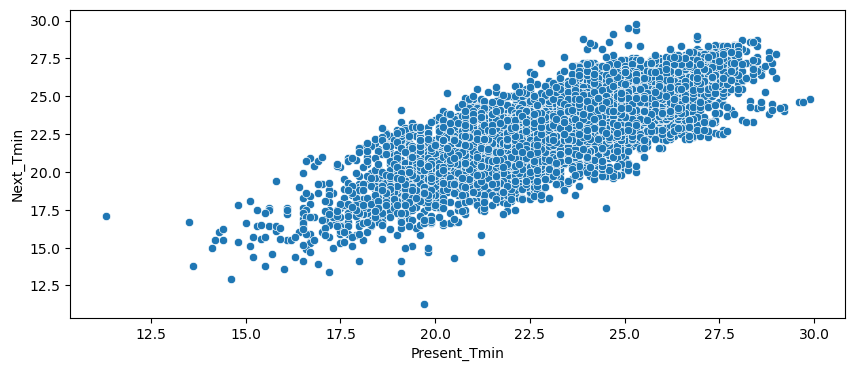

In [22]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmin')

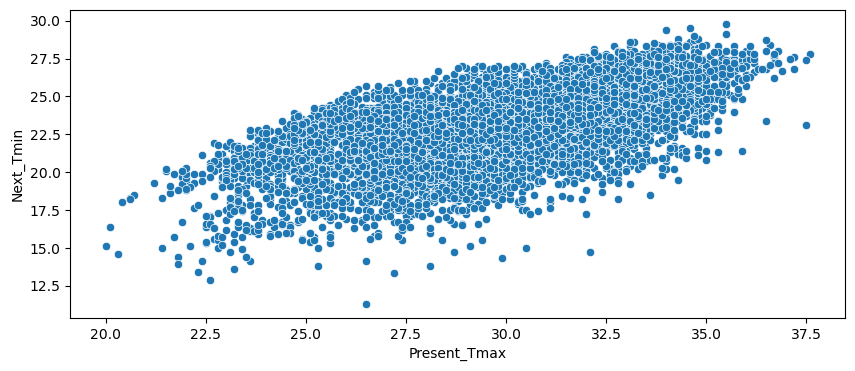

In [23]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Present_Tmax',y='Next_Tmin',data=df)
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmin')

<Axes: xlabel='Next_Tmax', ylabel='Density'>

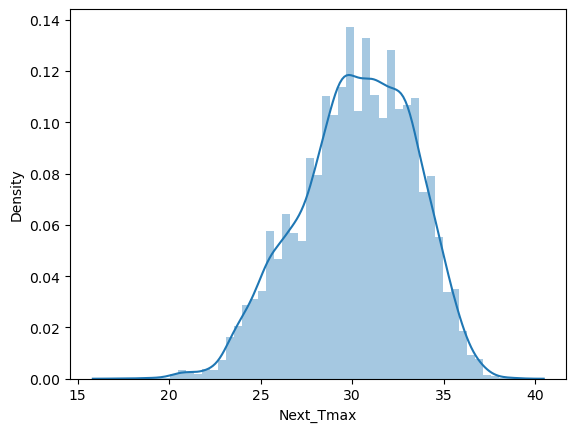

In [24]:
sns.distplot(df['Next_Tmax'],kde=True)

<Axes: xlabel='Next_Tmin', ylabel='Density'>

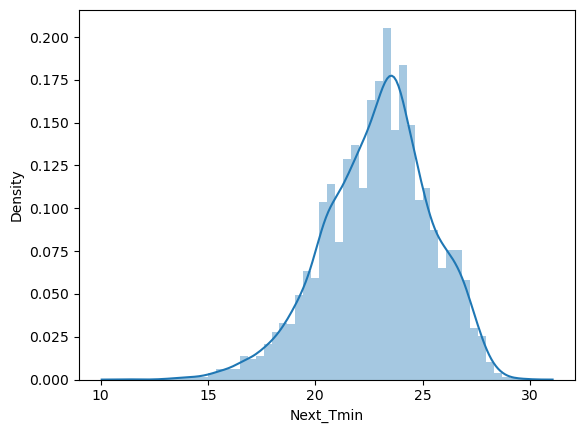

In [25]:
sns.distplot(df['Next_Tmin'],kde=True)

In [26]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [27]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   int64  
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


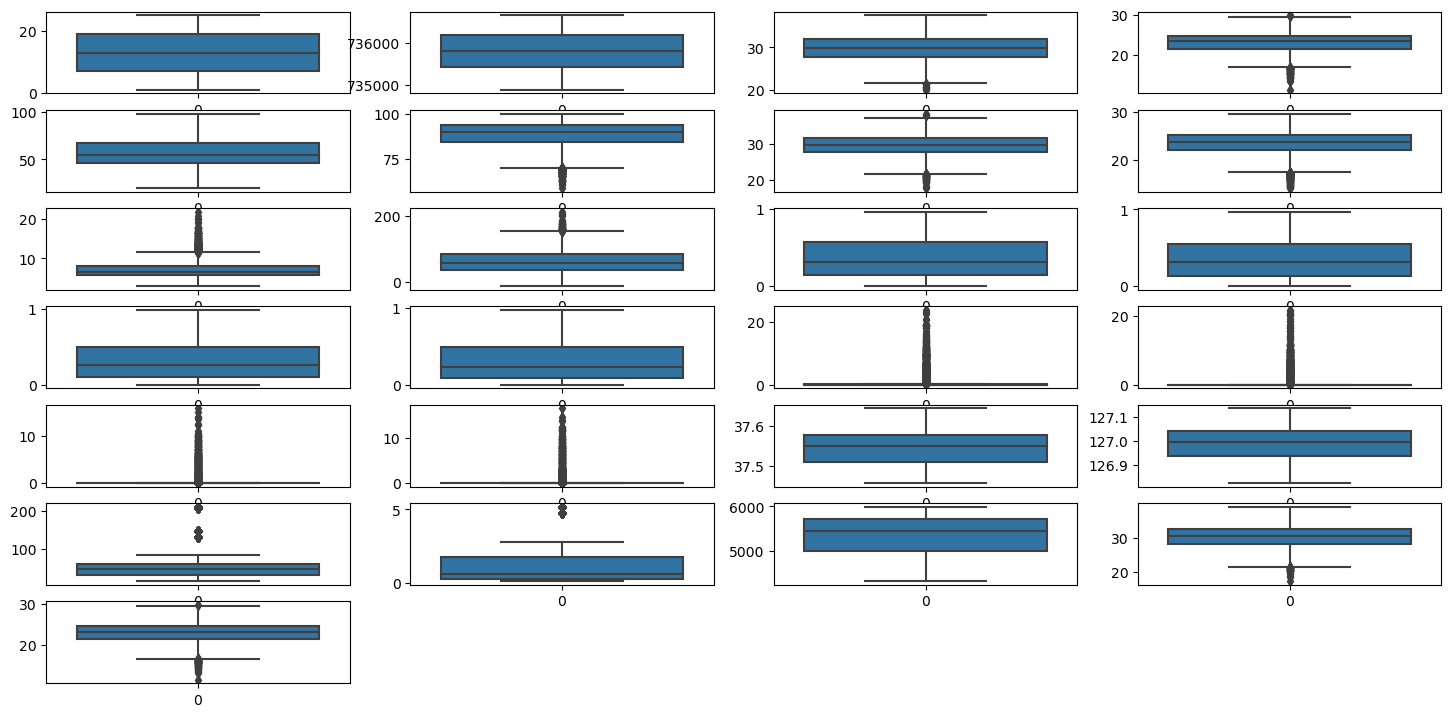

In [29]:
plt.figure(figsize=(18,10))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(df[i[1]])

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [33]:
df_new.shape,df.shape

((6739, 25), (7588, 25))

In [34]:
from scipy.stats import iqr
IQR=iqr(df)
IQR

37.2645068965

In [35]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)

In [36]:
df_iqr=df[~((df < (Q1-1.5*IQR)) | ((df > (Q3 + 1.5*IQR)))).any(axis=1)]

In [37]:
df_iqr

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1796,22.0,735483,32.6,25.1,24.289913,91.573631,34.710811,25.045511,7.179247,121.371287,...,0.0,0.000000,0.0,37.5102,127.086,21.9668,0.1332,5783.190430,33.3,25.3
1797,23.0,735483,34.0,25.6,30.831312,94.451157,33.977615,24.669786,7.758829,116.632638,...,0.0,0.000000,0.0,37.5372,126.891,15.5876,0.1554,5781.881348,34.8,24.9
1798,24.0,735483,33.2,25.7,25.498251,93.559174,34.910026,24.835839,7.927862,70.724680,...,0.0,0.000000,0.0,37.5237,126.909,17.2956,0.2223,5780.575684,34.6,24.7
1802,3.0,735513,33.6,24.8,32.313007,84.844360,32.353954,23.262754,9.043012,16.360621,...,0.0,0.000000,0.0,37.5776,127.058,33.3068,0.2661,5783.686035,33.4,23.1
1803,4.0,735513,33.0,24.2,40.340652,89.294586,30.987291,21.366261,7.216709,103.905201,...,0.0,0.000000,0.0,37.6450,127.022,45.7160,2.5348,5776.879395,34.0,23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823,24.0,736191,34.0,26.8,51.009285,83.817612,32.468103,26.305117,6.116524,53.123579,...,0.0,0.005129,0.0,37.5237,126.909,17.2956,0.2223,4950.971680,35.7,26.9
5824,25.0,736191,34.7,27.0,41.667278,81.201172,33.510492,26.575927,6.631261,30.169538,...,0.0,0.000000,0.0,37.5237,126.970,19.5844,0.2713,4961.735840,36.5,27.0
5833,9.0,736192,34.3,25.3,47.203590,90.999664,32.038195,24.848857,4.771669,121.051648,...,0.0,0.000000,0.0,37.4967,126.826,50.9312,0.4125,4949.122559,34.3,25.4
5839,15.0,736192,34.3,26.1,35.240994,76.846245,34.084953,26.469045,6.235962,25.654603,...,0.0,0.000000,0.0,37.5507,126.937,30.0464,0.8552,4945.837402,33.9,26.0


In [38]:
df_iqr.shape

(2095, 25)

In [39]:
df=df_new

In [40]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


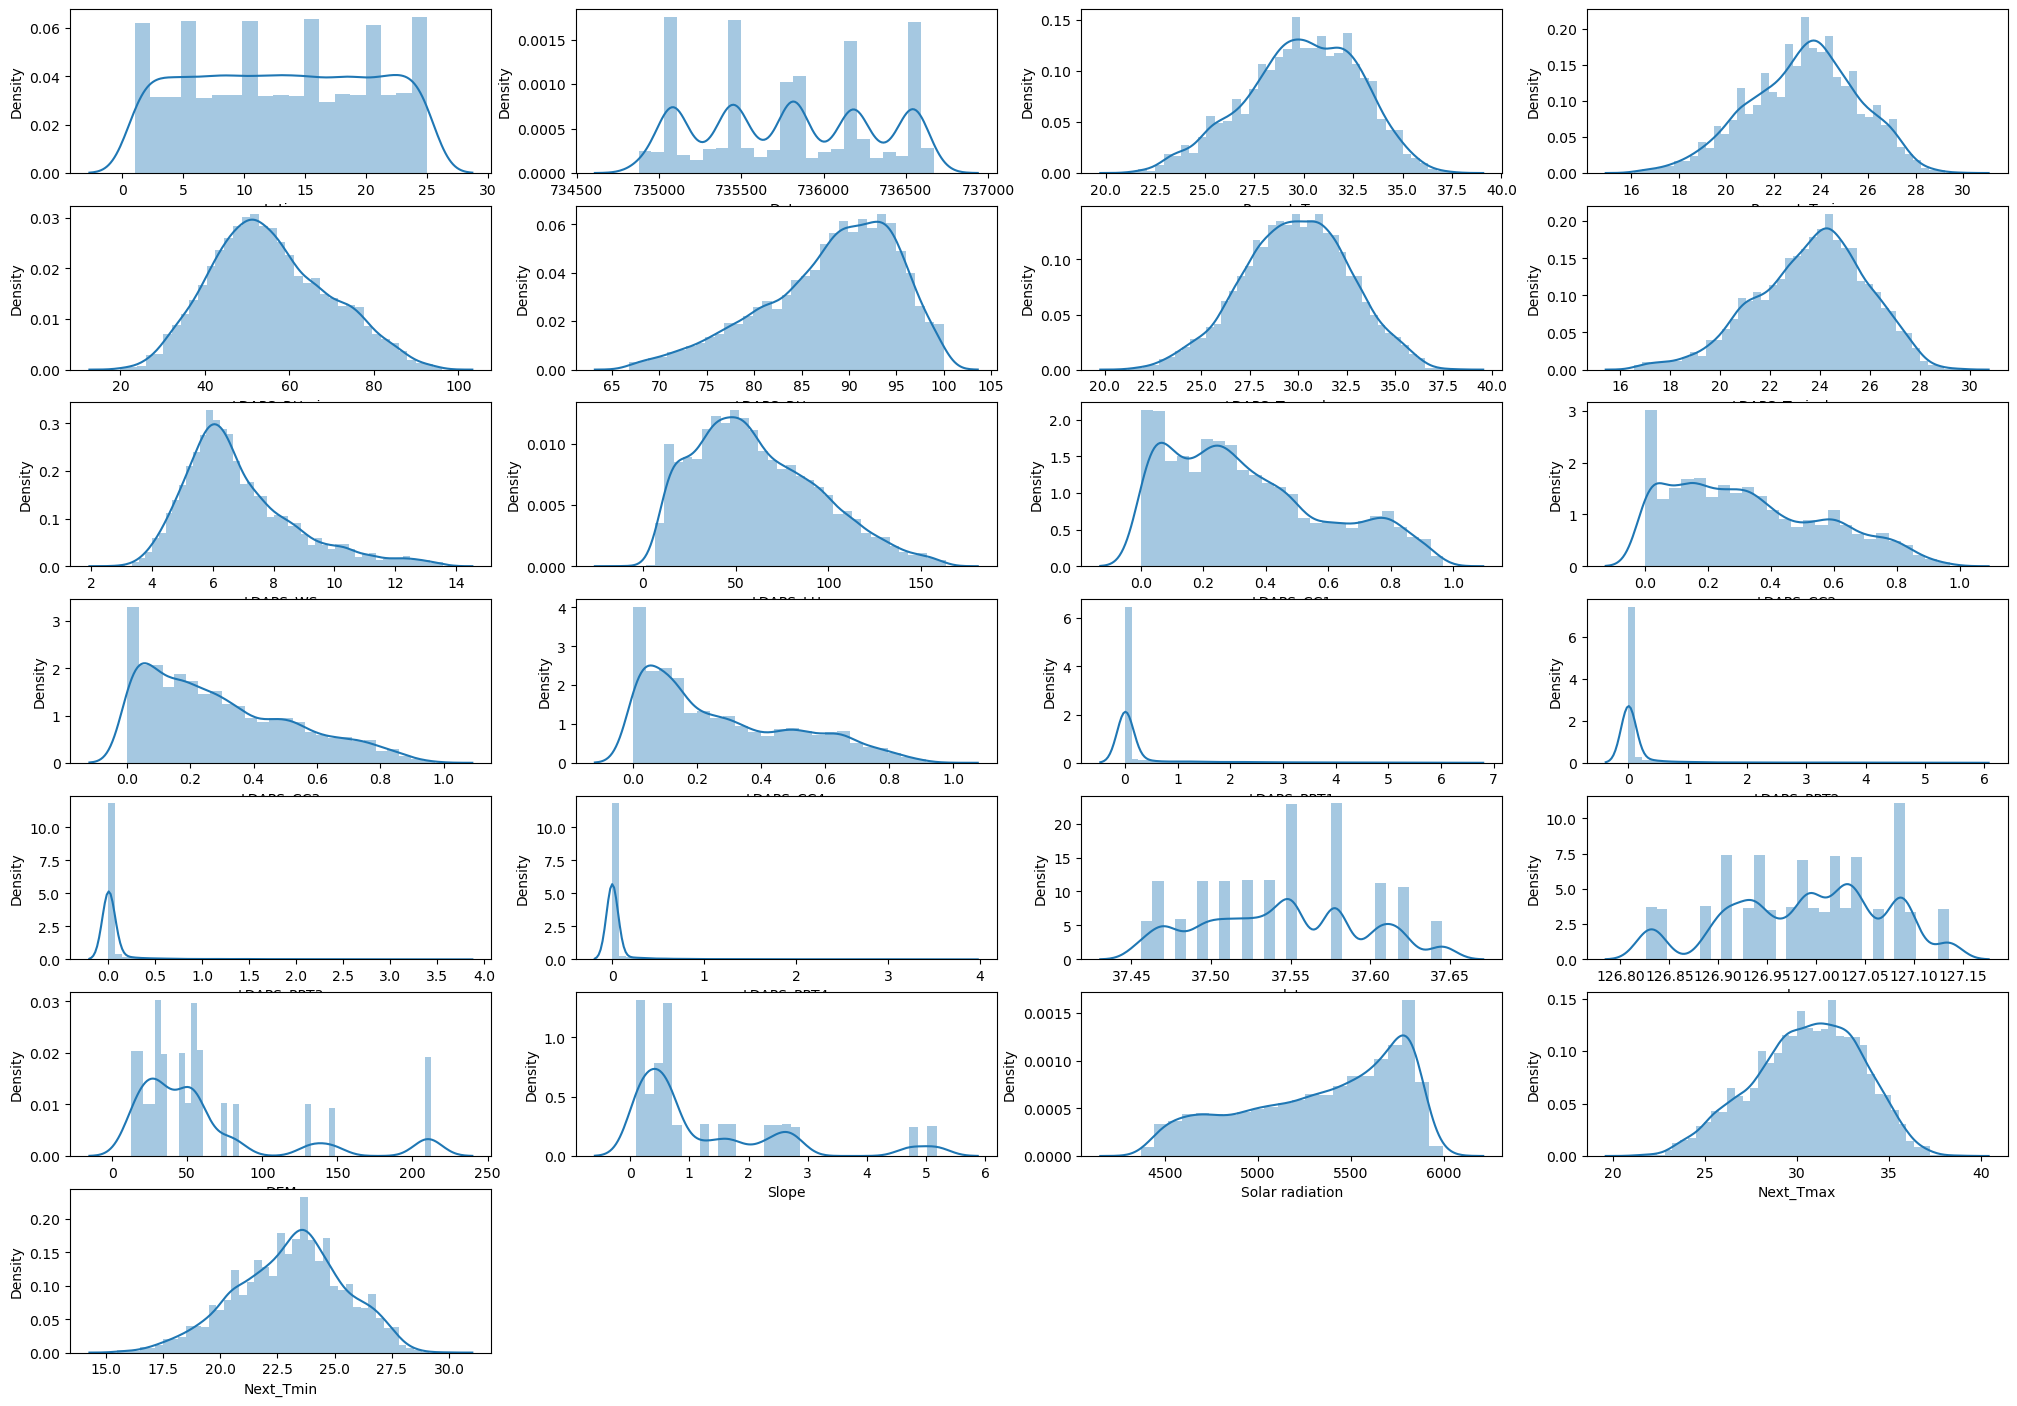

In [41]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]])
    

In [42]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [43]:
df.Next_Tmax.skew()

-0.2675260943427321

In [44]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [45]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [46]:
y1=df.Next_Tmax
y2=df.Next_Tmin
x=df.iloc[:,0:-2]

In [47]:
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,735049,28.7,21.4,58.255688,0.348222,28.074101,23.006936,0.176871,0.349992,...,-0.512476,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,126.991,1.854393,1.327776,1.891687
1,2.0,735049,31.9,21.6,52.263397,0.261118,29.850689,24.035009,-0.574617,-0.166810,...,-0.532674,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,127.032,0.069704,-0.375858,1.431077
2,3.0,735049,31.6,23.3,48.690479,-0.717348,30.091292,24.565633,-0.252083,-1.378337,...,-0.443077,-0.52537,-0.484794,-0.461889,-0.414444,37.5776,127.058,-0.353433,-0.944115,1.410511
3,4.0,735049,32.0,23.4,58.239788,1.375094,29.704629,23.326177,-0.606795,0.245926,...,-0.491694,-0.52537,-0.484794,-0.461889,-0.414444,37.6450,127.022,0.098766,1.249133,1.387059
4,5.0,735049,31.4,21.9,56.174095,0.186035,29.113934,23.486480,-0.541825,1.298111,...,-0.278264,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.135,-0.278815,-0.392364,1.396254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,-1.363447,27.812697,18.303014,0.048293,-2.013062,...,-1.453999,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.040,-0.712912,-0.269357,-1.763704
7746,22.0,736571,22.5,17.4,30.094858,-0.753410,26.704905,17.814038,-0.516916,0.685720,...,-1.339338,-0.52537,-0.484794,-0.461889,-0.414444,37.5102,127.086,-0.999559,-1.353609,-1.781247
7747,23.0,736571,23.3,17.1,26.741310,-1.302260,26.352081,18.775678,-0.244791,0.421213,...,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,37.5372,126.891,-1.576584,-1.278502,-1.779394
7748,24.0,736571,23.3,17.7,24.040634,-1.457152,27.010193,18.733519,0.011101,-0.319269,...,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,37.5237,126.909,-1.397502,-1.069018,-1.785446


In [48]:
y1,y2

(0       29.1
 1       30.5
 2       31.1
 3       31.7
 4       31.2
         ... 
 7745    27.6
 7746    28.0
 7747    28.3
 7748    28.6
 7749    27.8
 Name: Next_Tmax, Length: 6739, dtype: float64,
 0       21.2
 1       22.5
 2       23.9
 3       24.3
 4       22.5
         ... 
 7745    17.7
 7746    17.1
 7747    18.1
 7748    18.8
 7749    17.4
 Name: Next_Tmin, Length: 6739, dtype: float64)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaled=MinMaxScaler()

In [51]:
x=scaled.fit_transform(x)

In [52]:
x

array([[0.        , 0.09688196, 0.45731707, ..., 1.        , 0.86830684,
        1.        ],
       [0.04166667, 0.09688196, 0.65243902, ..., 0.53546159, 0.34093562,
        0.87737784],
       [0.08333333, 0.09688196, 0.63414634, ..., 0.42532285, 0.16502796,
        0.87190263],
       ...,
       [0.91666667, 0.94432071, 0.12804878, ..., 0.10694767, 0.06151636,
        0.02269543],
       [0.95833333, 0.94432071, 0.12804878, ..., 0.15356116, 0.12636352,
        0.02108425],
       [1.        , 0.94432071, 0.12195122, ..., 0.20803715, 0.16943744,
        0.02532933]])

In [53]:
x=pd.DataFrame(x)

In [54]:
x

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.096882,0.457317,0.384058,0.503580,0.586593,0.405939,0.493730,0.650058,0.787477,...,0.284589,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.868307,1.000000
1,0.041667,0.096882,0.652439,0.398551,0.425122,0.566825,0.510782,0.572443,0.533759,0.734006,...,0.278725,0.0,0.0,0.0,0.0,0.786017,0.666667,0.535462,0.340936,0.877378
2,0.083333,0.096882,0.634146,0.521739,0.378341,0.344769,0.524981,0.613070,0.583674,0.608654,...,0.304737,0.0,0.0,0.0,0.0,0.643008,0.750809,0.425323,0.165028,0.871903
3,0.125000,0.096882,0.658537,0.528986,0.503372,0.819633,0.502163,0.518173,0.528779,0.776710,...,0.290622,0.0,0.0,0.0,0.0,1.000000,0.634304,0.543026,0.843962,0.865660
4,0.166667,0.096882,0.621951,0.420290,0.476325,0.549785,0.467303,0.530446,0.538834,0.885575,...,0.352587,0.0,0.0,0.0,0.0,0.500530,1.000000,0.444745,0.335826,0.868107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,0.833333,0.944321,0.115854,0.123188,0.064083,0.198142,0.390512,0.133581,0.630159,0.542982,...,0.011239,0.0,0.0,0.0,0.0,0.500530,0.692557,0.331754,0.373904,0.026872
6735,0.875000,0.944321,0.079268,0.094203,0.134863,0.336585,0.325137,0.096143,0.542689,0.822213,...,0.044528,0.0,0.0,0.0,0.0,0.286017,0.841424,0.257142,0.038267,0.022202
6736,0.916667,0.944321,0.128049,0.072464,0.090954,0.212028,0.304315,0.169770,0.584802,0.794846,...,0.000000,0.0,0.0,0.0,0.0,0.429025,0.210356,0.106948,0.061516,0.022695
6737,0.958333,0.944321,0.128049,0.115942,0.055594,0.176877,0.343153,0.166542,0.624403,0.718231,...,0.000000,0.0,0.0,0.0,0.0,0.357521,0.268608,0.153561,0.126364,0.021084


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
maxr2_score=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,random_state=i,test_size=.20)
    lr=LinearRegression()
    lr.fit(x_train,y1_train)
    pred=lr.predict(x_test)
    score=r2_score(pred,y1_test)
    if score >maxr2_score:
        maxr2_score=score
        maxrs=i
        
print('Best accuracy is :-',maxr2_score,'in random state:-',maxrs)        

Best accuracy is :- 0.7286352362189449 in random state:- 43


In [57]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,random_state=43,test_size=.20)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

In [59]:
model=[LinearRegression(),Lasso(),RandomForestRegressor(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

In [60]:
for m in model:
    print('accuracy of :-',m)
    m.fit(x_train,y1_train)
    pred=m.predict(x_test)
    print('r2_ score :-',r2_score(y1_test,pred))
    print('MAE:-',mean_absolute_error(y1_test,pred))
    print('MSE:-',mean_squared_error(y1_test,pred))
    score=cross_val_score(m,x,y1,cv=5)
    print(score)
    print('cross val score:-',score.mean())
    print('diff betn r2 score and cross val score:-',r2_score(y1_test,pred)-abs(score.mean()))
    print('\n')

accuracy of :- LinearRegression()
r2_ score :- 0.7744407678160585
MAE:- 1.0661661727611897
MSE:- 1.9753986191392725
[0.68829238 0.66793548 0.67997159 0.72927557 0.51821855]
cross val score:- 0.6567387153459932
diff betn r2 score and cross val score:- 0.11770205247006538


accuracy of :- Lasso()
r2_ score :- -0.00012877129288368927
MAE:- 2.424940223484905
MSE:- 8.75890990869437
[-0.00723032 -0.13600643 -0.00042204 -0.26526513 -0.01439505]
cross val score:- -0.08466379339549354
diff betn r2 score and cross val score:- -0.08479256468837723


accuracy of :- RandomForestRegressor()
r2_ score :- 0.9043458630985433
MAE:- 0.6899391691394657
MSE:- 0.8377180934718094
[0.73241314 0.66310225 0.66940838 0.72957066 0.53738716]
cross val score:- 0.6663763188175407
diff betn r2 score and cross val score:- 0.2379695442810026


accuracy of :- SVR()
r2_ score :- 0.8446155814906715
MAE:- 0.8414450123719163
MSE:- 1.3608228880153945
[0.73671736 0.5835151  0.69046601 0.70102336 0.47552855]
cross val score:- 

In [61]:
param={'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
      'max_features' :['sqrt', 'log2']}

In [62]:
rf_grid=GridSearchCV(RandomForestRegressor(),param,cv=5)
rf_grid.fit(x_train,y1_train)
rf_grid.best_params_,rf_grid.best_score_

({'criterion': 'squared_error', 'max_features': 'sqrt'}, 0.8998408043411119)

In [63]:
rf_grid_pred=rf_grid.best_estimator_.predict(x_test)

In [64]:
r2_score(rf_grid_pred,y1_test)

0.8938539581774212

In [65]:
import joblib
joblib.dump(rf_grid.best_estimator_,'Tmax_pred.obj')

['Tmax_pred.obj']

In [66]:
test=joblib.load('Tmax_pred.obj')

In [67]:
test.predict(x_test)

array([29.253, 32.468, 30.081, ..., 28.385, 24.782, 26.562])

In [68]:
y1_test

5006    28.6
947     33.4
3726    29.8
715     29.3
4242    33.0
        ... 
6848    33.4
4782    26.2
5083    28.2
6114    26.0
247     26.6
Name: Next_Tmax, Length: 1348, dtype: float64

In [70]:
maxr2_score=0
maxrs=0
for i in range(0,100):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,random_state=i,test_size=.20)
    lr.fit(x_train,y2_train)
    pred=lr.predict(x_test)
    score=r2_score(y2_test,pred)
    if score>maxr2_score:
        maxr2_score=score
        maxrs=i
        
print('best accuracy is :-',score,'in random state:-',i)

best accuracy is :- 0.8207150529137387 in random state:- 99


In [72]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,random_state=99,test_size=.20)

In [73]:
model=[LinearRegression(),Lasso(),RandomForestRegressor(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

In [76]:
for m in model:
    print('accuracy of :-',m)
    m.fit(x_train,y2_train)
    pred=m.predict(x_test)
    print('r2 score is:-',r2_score(pred,y2_test))
    print('MAE:-',mean_absolute_error(pred,y2_test))
    print('MSE:-',mean_squared_error(pred,y2_test))
    score=cross_val_score(m,x,y2,cv=5)
    print('cross val score:-',score.mean())
    print('differnce betn cross val score and r2 score is:-',r2_score(pred,y2_test)-abs(score.mean()))
    print('\n')

accuracy of :- LinearRegression()
r2 score is:- 0.785954910813496
MAE:- 0.7783239889180991
MSE:- 0.9825965803067516
cross val score:- 0.7666206734919008
differnce betn cross val score and r2 score is:- 0.019334237321595227


accuracy of :- Lasso()
r2 score is:- 0.0
MAE:- 1.8854751737564586
MSE:- 5.480704066166876
cross val score:- -0.14609380178657855
differnce betn cross val score and r2 score is:- -0.14609380178657855


accuracy of :- RandomForestRegressor()
r2 score is:- 0.8935152666218964
MAE:- 0.5454925816023742
MSE:- 0.5073745089020777
cross val score:- 0.7615013964407884
differnce betn cross val score and r2 score is:- 0.132013870181108


accuracy of :- SVR()
r2 score is:- 0.8736364365145621
MAE:- 0.5904914089663836
MSE:- 0.6010628052996887
cross val score:- 0.7261406088735084
differnce betn cross val score and r2 score is:- 0.14749582764105373


accuracy of :- DecisionTreeRegressor()
r2 score is:- 0.7894816467127845
MAE:- 0.8070474777448072
MSE:- 1.145645400593472
cross val sco

In [77]:
param={'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
      'max_features' :['sqrt', 'log2']}

In [78]:
rf_grid2=GridSearchCV(RandomForestRegressor(),param,cv=5)

In [79]:
rf_grid2.fit(x_train,y2_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2']})

In [80]:
rf_grid2.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt')

In [82]:
rf_grid2.best_score_,rf_grid2.best_params_

(0.9043363358126715, {'criterion': 'friedman_mse', 'max_features': 'sqrt'})

In [85]:
rf_grid2_pred=rf_grid2.best_estimator_.predict(x_test)

In [86]:
rf_grid2_pred

array([23.587, 23.227, 22.315, ..., 24.697, 20.575, 22.821])

In [87]:
joblib.dump(rf_grid2.best_estimator_,'Tmin_pred.obj')

['Tmin_pred.obj']

In [88]:
test2=joblib.load('Tmin_pred.obj')

In [89]:
test2.predict(x_test)

array([23.587, 23.227, 22.315, ..., 24.697, 20.575, 22.821])

In [90]:
y2_test

5360    22.8
2270    23.2
2171    21.9
4298    22.1
5835    24.4
        ... 
188     22.3
2479    22.4
2070    24.8
3245    20.7
7269    22.0
Name: Next_Tmin, Length: 1348, dtype: float64